# Analyzing Police Activity with pandas

# Preparing the data for analysis

# Examining the dataset

In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('RI-clean.csv', low_memory=False)

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())


              id state   stop_date stop_time location_raw  county_name  \
0  RI-2005-00001    RI  2005-01-02     01:55      Zone K1          NaN   
1  RI-2005-00002    RI  2005-01-02     20:30      Zone X4          NaN   
2  RI-2005-00003    RI  2005-01-04     11:30      Zone X1          NaN   
3  RI-2005-00004    RI  2005-01-04     12:55      Zone X4          NaN   
4  RI-2005-00005    RI  2005-01-06     01:30      Zone X4          NaN   

   county_fips  fine_grained_location police_department driver_gender  ...  \
0          NaN                    NaN               600             M  ...   
1          NaN                    NaN               500             M  ...   
2          NaN                    NaN               000           NaN  ...   
3          NaN                    NaN               500             M  ...   
4          NaN                    NaN               500             M  ...   

   search_conducted  search_type_raw search_type contraband_found  \
0             Fal

# Dropping columns

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(509681, 26)
(509681, 24)


# Dropping rows

In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=["driver_gender"], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64
id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department          

# Fixing a data type

In [4]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object
bool


# Combining object columns

In [5]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)


id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


# Setting the index

In [6]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)
Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_r

# Exploring the relationship between gender and policing

# Examining traffic violations

In [7]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64
Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64


# Comparing violations by gender

In [8]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender']=='F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender']=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64
Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64


# Comparing speeding outcomes by gender

In [9]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True)) 

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True)) 


Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


# Calculating the search rate

In [10]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())


object
False    0.963041
True     0.036959
Name: search_conducted, dtype: float64
0.036959199640437465


# Comparing search rates by gender

In [11]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.018751239152648355


In [12]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04379217389811301


In [13]:
ri['search_conducted'] = ri.search_conducted.astype('bool')

In [14]:
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64


# Adding a second factor to the analysis

In [15]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.040245
               Moving violation       0.038021
               Other                  0.045898
               Registration/plates    0.054700
               Seat belt              0.017746
               Speeding               0.007738
M              Equipment              0.070916
               Moving violation       0.059156
               Other                  0.046120
               Registration/plates    0.103589
               Seat belt              0.031705
               Speeding               0.026630
Name: search_conducted, dtype: float64


In [16]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64


# Counting protective frisks

In [17]:
# Count the 'search_type' values
print(ri['search_type'].value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

# Take the sum of 'frisk'
print(ri['frisk'].sum())

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

# Comparing frisk rates by gender

In [18]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.08996734601959239
driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64


# Visual exploratory data analysis

# Calculating the hourly arrest rate

In [19]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03454755048024903
stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64


# Plotting the hourly arrest rate

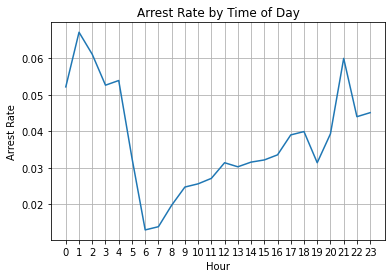

In [20]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.grid()

# Display the plot
plt.show();

# Plotting drug-related stops

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


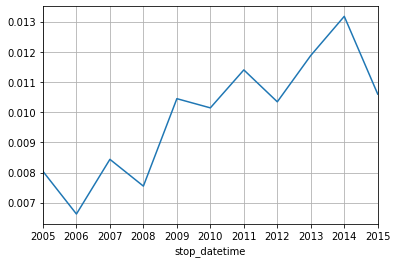

In [21]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.xticks(annual_drug_rate.index, annual_drug_rate.index.year)
plt.grid()
# Display the plot
plt.show()

# Comparing drug and search rates

<Figure size 1440x1440 with 0 Axes>

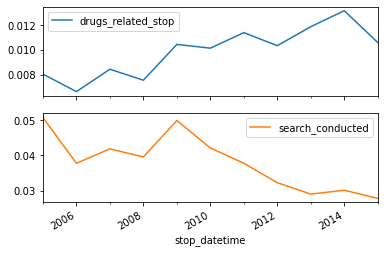

In [22]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
plt.figure(figsize=(20,20))
annual.plot(subplots=True)

# Display the subplots
plt.show();

# Tallying violations by district

In [23]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   
Zone X1         1725              3711    752                  192        451   
Zone X3        11520             17178   4069                 3532       4445   
Zone X4        19975             29554   8865                 7551       4870   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  
Zone X1        6393  
Zone X3       48687  
Zone X4       54855  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

# Plotting violations by district

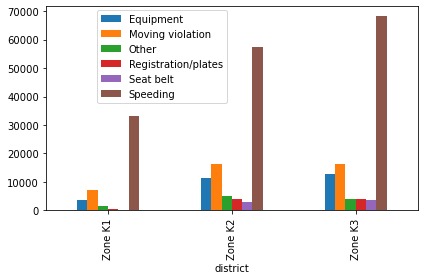

In [24]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 0.5))

# Display the plot
plt.show();

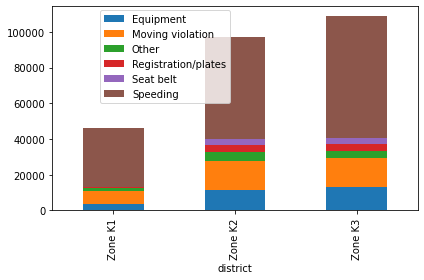

In [25]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(0.5, 0.5))

# Display the plot
plt.show();

# Converting stop durations to numbers

In [26]:
ri.stop_duration.head()

stop_datetime
2005-01-02 01:55:00     0-15 Min
2005-01-02 20:30:00    16-30 Min
2005-01-04 12:55:00     0-15 Min
2005-01-06 01:30:00     0-15 Min
2005-01-12 08:05:00      30+ Min
Name: stop_duration, dtype: object

In [27]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']
[ 8. 23. 45. nan]


# Plotting stop length

In [28]:
ri.violation_raw.head()

stop_datetime
2005-01-02 01:55:00                          Speeding
2005-01-02 20:30:00                          Speeding
2005-01-04 12:55:00    Equipment/Inspection Violation
2005-01-06 01:30:00    Equipment/Inspection Violation
2005-01-12 08:05:00                  Call for Service
Name: violation_raw, dtype: object

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64


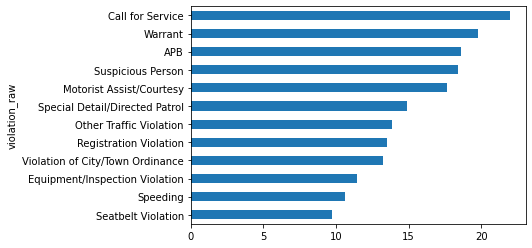

In [29]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show();

# Analyzing the effect of weather on policing

In [30]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting the temperature

              TMIN         TAVG         TMAX
count  7996.000000  1217.000000  8005.000000
mean     42.099425    52.493016    61.247096
std      17.386667    17.829792    18.495043
min     -10.000000     6.000000    13.000000
25%      29.000000    39.000000    46.000000
50%      42.000000    54.000000    62.000000
75%      57.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


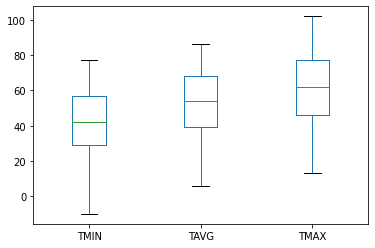

In [31]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

# Plotting the temperature difference

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64


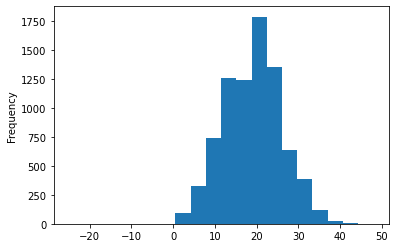

In [32]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show();

# Counting bad weather conditions

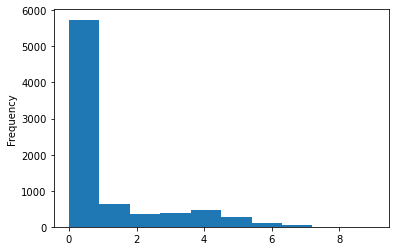

In [33]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, "WT01":"WT22"]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

In [34]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rating the weather conditions

In [35]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

good     5738
bad      1852
worse     432
Name: rating, dtype: int64


# Changing the data type to category

In [36]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', pd.api.types.CategoricalDtype(categories = cats, ordered=True))

#.rating.astype('category', ordered=True, categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']


# Preparing the DataFrames

In [37]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating
print(weather_rating.head())

        stop_datetime             id   stop_date stop_time location_raw  \
0 2005-01-02 01:55:00  RI-2005-00001  2005-01-02     01:55      Zone K1   
1 2005-01-02 20:30:00  RI-2005-00002  2005-01-02     20:30      Zone X4   
2 2005-01-04 12:55:00  RI-2005-00004  2005-01-04     12:55      Zone X4   
3 2005-01-06 01:30:00  RI-2005-00005  2005-01-06     01:30      Zone X4   
4 2005-01-12 08:05:00  RI-2005-00006  2005-01-12     08:05      Zone X1   

   county_fips  fine_grained_location police_department driver_gender  \
0          NaN                    NaN               600             M   
1          NaN                    NaN               500             M   
2          NaN                    NaN               500             M   
3          NaN                    NaN               500             M   
4          NaN                    NaN               000             M   

   driver_age_raw  ...  search_type contraband_found stop_outcome is_arrested  \
0          1985.0  ...       

# Merging the DataFrames

In [38]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(480584, 27)
(959952, 29)


# Comparing arrest rates by weather rating

In [39]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0345715202426788


In [40]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
bad      0.035226
good     0.034080
worse    0.039360
Name: is_arrested, dtype: float64


In [41]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            bad       0.059581
                     good      0.059125
                     worse     0.094373
Moving violation     bad       0.058081
                     good      0.056805
                     worse     0.062249
Other                bad       0.084950
                     good      0.080682
                     worse     0.058704
Registration/plates  bad       0.092634
                     good      0.083238
                     worse     0.098673
Seat belt            bad       0.028795
                     good      0.026339
                     worse     0.000000
Speeding             bad       0.013348
                     good      0.013494
                     worse     0.016600
Name: is_arrested, dtype: float64


# Selecting from a multi-indexed Series

In [42]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc["Moving violation", "bad"])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc["Speeding"])


violation            rating
Equipment            bad       0.059581
                     good      0.059125
                     worse     0.094373
Moving violation     bad       0.058081
                     good      0.056805
                     worse     0.062249
Other                bad       0.084950
                     good      0.080682
                     worse     0.058704
Registration/plates  bad       0.092634
                     good      0.083238
                     worse     0.098673
Seat belt            bad       0.028795
                     good      0.026339
                     worse     0.000000
Speeding             bad       0.013348
                     good      0.013494
                     worse     0.016600
Name: is_arrested, dtype: float64
0.0580814717477004
rating
bad      0.013348
good     0.013494
worse    0.016600
Name: is_arrested, dtype: float64


# Reshaping the arrest rate data

In [43]:
# Unstack the 'arrest_rate' Series into a DataFrame
display(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,bad,good,worse
violation,,,
Equipment,0.059581,0.059125,0.094373
Moving violation,0.058081,0.056805,0.062249
Other,0.084950,0.080682,0.058704
Registration/plates,0.092634,0.083238,0.098673
Seat belt,0.028795,0.026339,0.000000
Speeding,0.013348,0.013494,0.016600


rating,bad,good,worse
violation,,,
Equipment,0.059581,0.059125,0.094373
Moving violation,0.058081,0.056805,0.062249
Other,0.084950,0.080682,0.058704
Registration/plates,0.092634,0.083238,0.098673
Seat belt,0.028795,0.026339,0.000000
Speeding,0.013348,0.013494,0.016600
